In [36]:
import numpy as np
import matplotlib.pyplot as plt
from numba import njit
from scipy import linalg

gamma = 1.4



def MC_RM(a,b,c): # the precise linear MC reconstruction method
    sign_a = np.sign(a) # -1 , 0 , 1 
    sign_b = np.sign(b) 
    sign_c = np.sign(c)
    s_i = 0.5 * (sign_a +sign_b)*min(abs(a),abs(b))
    sign_i = np.sign(s_i)
    s_f = 0.5 * (sign_i +sign_c)*min(abs(s_i),abs(c))
    return   s_f 




def conserved_variables(rho,v,p):
    n = rho.size 
    U = np.zeros((5,n))
    U[0,:] = rho 
    U[1,:] = rho * v[0] # x 축
    U[2,:] = rho * v[1] # y 축
    U[3,:] = rho * v[2] # y 축
    kinematics = 0.5*rho*(v[0]**2+v[1]**2+v[2]**2)
    U[4,:] = p/(gamma-1) + kinematics  # using ideal gas
    return U


def primitive_variables(U):
    rho = U[0]
    v_x = U[1]/rho 
    v_y = U[2]/rho 
    v_z = U[3]/rho
    p = (gamma - 1)*(U[4]-0.5*rho*(v_x**2+v_y**2+v_z**2))  # ideal gas 
    return rho, v_x,v_y,v_z,p


def flux(U):
    rho,v_x,v_y,v_z,p = primitive_variables(U)
    n = rho.size 
    F = np.zeros((5,n))
    F[0,:] = rho*v_x 
    F[1,:] = rho*v_x*v_x + p 
    F[2,:] = rho*v_x*v_y 
    F[3,:]= rho*v_x*v_z 
    E = U[4]
    F[4,:] = v_x*(E+p)
    return F


def periodic(U,nx,ng):

    U[:,:ng] = U[:,nx:nx+ng] # Periodic 
    U[:,nx+ng:] = U[:,ng:ng+ng] # Periodic
    # q[:ng] = q[ng] # ongoing
    # q[nx+ng:] = q[ng+nx-1] # ongoing
    return U




x_min, x_max, nx = -1,1,400
dx = (x_max-x_min) / (nx)
x0 = 0.0
ng= 2 
N = nx + 2*ng

v = 1.0
Time_set = 1.0
lam= 0.5
sig = 0.1
dt = lam*(dx/v)
A = 1.0
Time = 0.0

x = np.zeros(N)

for i in range(N):
    x[i] = x_min + (i-ng+0.5)*dx

rho = A * np.exp(-(x-x0)**2/sig**2)

v = np.array([1.0,3.0,5.0])

p = 1.0

U = conserved_variables(rho,v,p)

def riemann_flux(UL, UR,vx):
    n = UL.size
    FL = flux(UL)
    FR = flux(UR)
    UR = UR.reshape(n,1)
    UL = UL.reshape(n,1)
    return 0.5* ((FL+FR) - vx*(UR-UL))

UL = U[:,2]
UR = U[:,3]

FL = flux(UL)
FR = flux(UR)
UR = UR.reshape(5,1)
UL = UL.reshape(5,1)

ff = FL+FR - 1*(UR-UL)
ff

array([[1.22590725e-43],
       [2.00000000e+00],
       [3.67772174e-43],
       [6.12953623e-43],
       [7.00000000e+00]])

In [82]:
import numpy as np
import matplotlib.pyplot as plt
from numba import njit
from scipy import linalg

gamma = 1.4


def MC_RM(a,b,c): # the precise linear MC reconstruction method
    sign_a = np.sign(a) # -1 , 0 , 1 
    sign_b = np.sign(b) 
    sign_c = np.sign(c)
    s_i = 0.5 * (sign_a +sign_b)*min(abs(a),abs(b))
    sign_i = np.sign(s_i)
    s_f = 0.5 * (sign_i +sign_c)*min(abs(s_i),abs(c))
    return   s_f 



def conserved_variables(rho,v,p):
    n = rho.size 
    U = np.zeros((5,n))
    U[0,:] = rho 
    U[1,:] = rho * v[0] # x 축
    U[2,:] = rho * v[1] # y 축
    U[3,:] = rho * v[2] # y 축
    kinematics = 0.5*rho*(v[0]**2+v[1]**2+v[2]**2)
    U[4,:] = p/(gamma-1) + kinematics  # using ideal gas
    return U


def primitive_variables(U):
    rho = U[0]
    v_x = U[1]/rho 
    v_y = U[2]/rho 
    v_z = U[3]/rho
    p = (gamma - 1)*(U[4]-0.5*rho*(v_x**2+v_y**2+v_z**2))  # ideal gas 
    return rho, v_x,v_y,v_z,p

def flux(U):
    rho,v_x,v_y,v_z,p = primitive_variables(U)
    n = rho.size 
    F = np.zeros((5,n))
    F[0,:] = rho*v_x 
    F[1,:] = rho*v_x*v_x + p 
    F[2,:] = rho*v_x*v_y 
    F[3,:]= rho*v_x*v_z 
    E = U[4]
    F[4,:] = v_x*(E+p)
    return F



def periodic(U,nx,ng):

    U[:,:ng] = U[:,nx:nx+ng] # Periodic 
    U[:,nx+ng:] = U[:,ng:ng+ng] # Periodic
    # q[:ng] = q[ng] # ongoing
    # q[nx+ng:] = q[ng+nx-1] # ongoing
    return U



def riemann_flux(UL, UR, vx):

    n = UL.size
    FL = flux(UL)
    FR = flux(UR)
    UL = UL.reshape(n,1)
    UR = UR.reshape(n,1)
    return 0.5* ((FL+FR) - vx*(UR-UL))


N = nx+2*ng 
# UL = np.zeros((5, N))
# UR = np.zeros((5, N))
# F_half =np.zeros((5, N+1))


x_min, x_max, nx = -1,1,400
dx = (x_max-x_min) / (nx)
x0 = 0.0
ng= 2 
N = nx + 2*ng

v = 1.0
Time_set = 1.0
lam= 0.5
sig = 0.1
dt = lam*(dx/v)
A = 1.0
Time = 0.0

x = np.zeros(N)

for i in range(N):
    x[i] = x_min + (i-ng+0.5)*dx

rho = A * np.exp(-(x-x0)**2/sig**2)

v = np.array([1.0,3.0,5.0])

p = 1.0

U = conserved_variables(rho,v,p)

print(U.shape)

vx = 1


for i in range(ng-1,N-ng+1):
    rho_i,vx_i,vy_i,vz_i,p_i = primitive_variables(U[:,i])
    
    for k in range(5):
        sL = (U[k,i] - U[k,i-1]) /(dx) 
        sR = (U[k,i+1] - U[k,i]) /(dx) 
        sC = (U[k,i+1] - U[k,i-1]) /(2*dx) 
        
        s_i = MC_RM(sL*2,sR*2,sC) 
        dqdt = -vx_i*s_i 

        UL[k,i] = U[k,i] - s_i*(dx)*0.5 + dt*0.5*(dqdt)
        UR[k,i] = U[k,i] + s_i*(dx)*0.5 + dt*0.5*(dqdt)

F_half =np.zeros((5,N+1))

for i in range(ng,N-ng+1):
    # print(riemann_flux(UR[:,i-1], UL[:,i],vx))
    F_half[:,i] = riemann_flux(UR[:,i-1], UL[:,i],vx).squeeze()

U_new =np.zeros((5, N))
for i in range(ng,N-ng+1):
    U_new[:,i] = U[:,i] - (F_half[:,i+1]-F_half[:,i])/dx * dt


U.shape


(5, 404)


(5, 404)

In [108]:
import numpy as np
import matplotlib.pyplot as plt
from numba import njit
from scipy import linalg

gamma = 1.4


def MC_RM(a,b,c): # the precise linear MC reconstruction method
    sign_a = np.sign(a) # -1 , 0 , 1 
    sign_b = np.sign(b) 
    sign_c = np.sign(c)
    s_i = 0.5 * (sign_a +sign_b)*min(abs(a),abs(b))
    sign_i = np.sign(s_i)
    s_f = 0.5 * (sign_i +sign_c)*min(abs(s_i),abs(c))
    return   s_f 



def conserved_variables(rho,v,p):
    n = rho.size 
    U = np.zeros((5,n))
    U[0,:] = rho 
    U[1,:] = rho * v[0] # x 축
    U[2,:] = rho * v[1] # y 축
    U[3,:] = rho * v[2] # y 축
    kinematics = 0.5*rho*(v[0]**2+v[1]**2+v[2]**2)
    U[4,:] = p/(gamma-1) + kinematics  # using ideal gas
    return U


def primitive_variables(U):
    rho = U[0]
    v_x = U[1]/rho 
    v_y = U[2]/rho 
    v_z = U[3]/rho
    p = (gamma - 1)*(U[4]-0.5*rho*(v_x**2+v_y**2+v_z**2))  # ideal gas 
    return rho, v_x,v_y,v_z,p

def flux(U):
    rho,v_x,v_y,v_z,p = primitive_variables(U)
    n = rho.size 
    F = np.zeros((5,n))
    F[0,:] = rho*v_x 
    F[1,:] = rho*v_x*v_x + p 
    F[2,:] = rho*v_x*v_y 
    F[3,:]= rho*v_x*v_z 
    E = U[4]
    F[4,:] = v_x*(E+p)
    return F


def periodic(U,nx,ng):

    U[:,:ng] = U[:,nx:nx+ng] # Periodic 
    U[:,nx+ng:] = U[:,ng:ng+ng] # Periodic
    # q[:ng] = q[ng] # ongoing
    # q[nx+ng:] = q[ng+nx-1] # ongoing
    return U



def riemann_flux(UL, UR,vx):

    n = UL.size
    FL = flux(UL)
    FR = flux(UR)
    UL = UL.reshape(n,1)
    UR = UR.reshape(n,1)
    return 0.5* ((FL+FR) - vx*(UR-UL))

def PC_Method_U(U,nx,ng,dx,dt,vx):

    U = periodic(U,nx,ng)

    N = nx+2*ng 
    UL = np.zeros((5, N))
    UR = np.zeros((5, N))
    F_half =np.zeros((5, N+1))
    U_new =np.zeros((5, N))

    for i in range(ng-1,N-ng+1):
        
        for k in range(5):
            sL = (U[k,i] - U[k,i-1]) /(dx) 
            sR = (U[k,i+1] - U[k,i]) /(dx) 
            sC = (U[k,i+1] - U[k,i-1]) /(2*dx) 
            
            s_i = MC_RM(sL*2,sR*2,sC) 
            dqdt = -vx*s_i 

            UL[k,i] = U[k,i] - s_i*(dx)*0.5 + dt*0.5*(dqdt)
            UR[k,i] = U[k,i] + s_i*(dx)*0.5 + dt*0.5*(dqdt)
    for i in range(ng,N-ng+1):
        F_half[:,i] = riemann_flux(UR[:,i-1], UL[:,i],vx).squeeze()
           
    for i in range(ng,N-ng+1):
        U_new[:,i] = U[:,i] - (F_half[:,i+1]-F_half[:,i])/dx * dt

    return U_new


x_min, x_max, nx = -1,1,400
dx = (x_max-x_min) / (nx)
x0 = 0.0
ng= 2 
N = nx + 2*ng

v = 1.0
Time_set = 2.0
lam= 0.2
sig = 0.1
dt = lam*(dx/v)
A = 1.0
Time = 0.0

x = np.zeros(N)

for i in range(N):
    x[i] = x_min + (i-ng+0.5)*dx

rho = A * np.exp(-(x-x0)**2/sig**2)
vx= 1.0
vy = 3.0
vz= 5.0
v = np.array([vx,vy,vz])

p = 1.0

U = conserved_variables(rho,v,p)

Time_set = dt*6
while Time < Time_set:
    if Time + dt > Time_set:   
        dt = Time_set - Time   # For Time == Time_set 

    U =  PC_Method_U(U,nx,ng,dx,dt,vx)
   
    Time += dt 


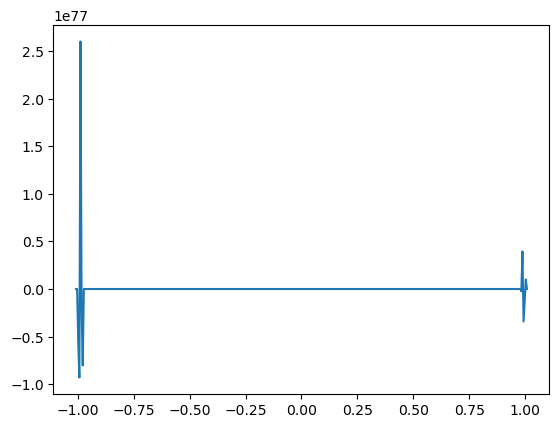

In [109]:
plt.plot(x,U[0,:])

In [112]:
import numpy as np
from numba import njit
from scipy import linalg

gamma = 1.4


@njit
def MC_RM(a,b,c):
    sign_a = np.sign(a)
    sign_b = np.sign(b)
    sign_c = np.sign(c)
    s_i = 0.5 * (sign_a + sign_b) * min(abs(a), abs(b))
    sign_i = np.sign(s_i)
    s_f = 0.5 * (sign_i + sign_c) * min(abs(s_i), abs(c))
    return s_f

@njit
def conserved_variables(rho, v, p):
    n = rho.size
    U = np.zeros((5, n))
    U[0, :] = rho
    U[1, :] = rho * v[0]
    U[2, :] = rho * v[1]
    U[3, :] = rho * v[2]
    kinematics = 0.5 * rho * (v[0]**2 + v[1]**2 + v[2]**2)
    U[4, :] = p/(gamma-1) + kinematics
    return U

@njit
def primitive_variables(U):
    # U: (5,) or (5,n)
    rho = U[0]
    v_x = U[1] / rho
    v_y = U[2] / rho
    v_z = U[3] / rho
    p = (gamma - 1) * (U[4] - 0.5 * rho * (v_x**2 + v_y**2 + v_z**2))
    return rho, v_x, v_y, v_z, p

@njit
def flux_x(U):
    # U must be (5,)
    rho, vx, vy, vz, p = primitive_variables(U)
    F = np.zeros(5)
    F[0] = rho * vx
    F[1] = rho * vx * vx + p
    F[2] = rho * vx * vy
    F[3] = rho * vx * vz
    E = U[4]
    F[4] = vx * (E + p)
    return F

@njit
def periodic(U, nx, ng):
    # U: (5, nx+2ng)
    U[:, :ng] = U[:, nx:nx+ng]
    U[:, nx+ng:] = U[:, ng:ng+ng]
    return U

@njit
def rusanov_flux(UL, UR):
    # UL, UR: (5,)
    rhoL, vxL, vyL, vzL, pL = primitive_variables(UL)
    rhoR, vxR, vyR, vzR, pR = primitive_variables(UR)

    aL = np.sqrt(gamma * pL / rhoL)
    aR = np.sqrt(gamma * pR / rhoR)
    smax = max(abs(vxL) + aL, abs(vxR) + aR)

    FL = flux_x(UL)
    FR = flux_x(UR)
    return 0.5 * (FL + FR) - 0.5 * smax * (UR - UL)

@njit
def PC_Method_U(U, nx, ng, dx, dt):
    U = periodic(U, nx, ng)
    N = nx + 2*ng

    # primitive arrays for reconstruction
    rho, vx, vy, vz, p = primitive_variables(U)
    Q = np.vstack([rho, vx, vy, vz, p])   # (5, N)

    QL = np.zeros_like(Q)
    QR = np.zeros_like(Q)

    # 1) reconstruct in primitive
    for i in range(ng-1, N-ng+1):
        for k in range(5):
            sL = (Q[k, i]   - Q[k, i-1]) / dx
            sR = (Q[k, i+1] - Q[k, i])   / dx
            sC = (Q[k, i+1] - Q[k, i-1]) / (2*dx)

            s_i = MC_RM(2*sL, 2*sR, sC)

            # simple predictor: use local vx (primitive) for advection-like term
            dqdt = -vx[i] * s_i

            QL[k, i] = Q[k, i] - 0.5*dx*s_i + 0.5*dt*dqdt
            QR[k, i] = Q[k, i] + 0.5*dx*s_i + 0.5*dt*dqdt

    # 2) convert reconstructed primitive -> conserved at interfaces
    #    and compute Rusanov flux
    F_half = np.zeros((5, N+1))
    for i in range(ng, N-ng+1):
        # left state at i: QR[:, i-1], right state at i: QL[:, i]
        rhoL, vxL, vyL, vzL, pL = QR[:, i-1]
        rhoR, vxR, vyR, vzR, pR = QL[:, i]

        UL = conserved_variables(np.array([rhoL]), np.array([vxL, vyL, vzL]), pL)[:, 0]
        UR = conserved_variables(np.array([rhoR]), np.array([vxR, vyR, vzR]), pR)[:, 0]

        F_half[:, i] = rusanov_flux(UL, UR)

    # 3) conservative update
    U_new = U.copy()
    for i in range(ng, N-ng+1):
        U_new[:, i] = U[:, i] - (dt/dx) * (F_half[:, i+1] - F_half[:, i])

    return U_new

# ------------------- run -------------------
x_min, x_max, nx = -1, 1, 400
ng = 2
N = nx + 2*ng
dx = (x_max - x_min) / nx

x0 = 0.0
sig = 0.1
A = 1.0

x = np.zeros(N)
for i in range(N):
    x[i] = x_min + (i-ng+0.5)*dx

rho = A * np.exp(-(x-x0)**2/sig**2)
vx0, vy0, vz0 = 1.0, 3.0, 5.0
p0 = 1.0

U = conserved_variables(rho, np.array([vx0, vy0, vz0]), p0)

lam = 0.4         # 처음엔 0.4~0.2 추천 (더 안정 원하면 낮추기)
Time = 0.0
Time_set = 2.0    # 예시

while Time < Time_set:
    # CFL dt recompute (using current U)
    rho_c, vx_c, vy_c, vz_c, p_c = primitive_variables(U[:, ng:-ng])
    a_c = np.sqrt(gamma * p_c / rho_c)
    smax = np.max(np.abs(vx_c) + a_c)
    dt = lam * dx / smax

    if Time + dt > Time_set:
        dt = Time_set - Time

    U = PC_Method_U(U, nx, ng, dx, dt)
    Time += dt


TypingError: Failed in nopython mode pipeline (step: nopython frontend)
[1m[1m[1mNo implementation of function Function(<function vstack at 0x000001BB4EE3B6A0>) found for signature:
 
 >>> vstack(list(array(float64, 1d, C))<iv=None>)
 
There are 2 candidate implementations:
[1m    - Of which 2 did not match due to:
    Overload of function 'vstack': File: numba\np\arrayobj.py: Line 5863.
      With argument(s): '(list(array(float64, 1d, C))<iv=None>)':[0m
[1m     No match.[0m
[0m
[0m[1mDuring: resolving callee type: Function(<function vstack at 0x000001BB4EE3B6A0>)[0m
[0m[1mDuring: typing of call at C:\Users\wlsdl\AppData\Local\Temp\ipykernel_19824\2688778595.py (81)
[0m
[1m
File "..\..\..\AppData\Local\Temp\ipykernel_19824\2688778595.py", line 81:[0m
[1m<source missing, REPL/exec in use?>[0m


In [ ]:
import numpy as np
from numba import njit

gamma = 1.4
rho_floor = 1e-12
p_floor   = 1e-12

@njit
def MC_RM(a,b,c):
    sign_a = np.sign(a)
    sign_b = np.sign(b)
    sign_c = np.sign(c)
    s_i = 0.5 * (sign_a + sign_b) * min(abs(a), abs(b))
    sign_i = np.sign(s_i)
    s_f = 0.5 * (sign_i + sign_c) * min(abs(s_i), abs(c))
    return s_f

@njit
def prim_from_cons_1(U):  # U: (5,) -> scalars
    rho = U[0]
    if rho < rho_floor:
        rho = rho_floor
    vx = U[1] / rho
    vy = U[2] / rho
    vz = U[3] / rho
    p  = (gamma - 1.0) * (U[4] - 0.5 * rho * (vx*vx + vy*vy + vz*vz))
    if p < p_floor:
        p = p_floor
    return rho, vx, vy, vz, p

@njit
def prim_from_cons_n(U):  # U: (5,N) -> arrays
    rho = U[0].copy()
    for i in range(rho.size):
        if rho[i] < rho_floor:
            rho[i] = rho_floor
    vx = U[1] / rho
    vy = U[2] / rho
    vz = U[3] / rho
    p  = (gamma - 1.0) * (U[4] - 0.5 * rho * (vx*vx + vy*vy + vz*vz))
    for i in range(p.size):
        if p[i] < p_floor:
            p[i] = p_floor
    return rho, vx, vy, vz, p

@njit
def flux_x_1(U):  # U: (5,)
    rho, vx, vy, vz, p = prim_from_cons_1(U)
    F = np.empty(5)
    F[0] = rho * vx
    F[1] = rho * vx * vx + p
    F[2] = rho * vx * vy
    F[3] = rho * vx * vz
    F[4] = vx * (U[4] + p)
    return F

@njit
def periodic(U, nx, ng):
    U[:, :ng] = U[:, nx:nx+ng]
    U[:, nx+ng:] = U[:, ng:ng+ng]
    return U

@njit
def rusanov_flux_1(UL, UR):
    rhoL, vxL, vyL, vzL, pL = prim_from_cons_1(UL)
    rhoR, vxR, vyR, vzR, pR = prim_from_cons_1(UR)

    aL = np.sqrt(gamma * pL / rhoL)
    aR = np.sqrt(gamma * pR / rhoR)
    smax = max(abs(vxL) + aL, abs(vxR) + aR)

    FL = flux_x_1(UL)
    FR = flux_x_1(UR)

    F = np.empty(5)
    for k in range(5):
        F[k] = 0.5*(FL[k] + FR[k]) - 0.5*smax*(UR[k] - UL[k])
    return F

@njit
def PC_Method_U(U, nx, ng, dx, dt):
    U = periodic(U, nx, ng)
    N = nx + 2*ng

    rho, vx, vy, vz, p = prim_from_cons_n(U)

    Q  = np.empty((5, N))
    Q[0, :] = rho
    Q[1, :] = vx
    Q[2, :] = vy
    Q[3, :] = vz
    Q[4, :] = p

    QL = np.zeros((5, N))
    QR = np.zeros((5, N))

    for i in range(ng-1, N-ng+1):
        for k in range(5):
            sL = (Q[k, i]   - Q[k, i-1]) / dx
            sR = (Q[k, i+1] - Q[k, i])   / dx
            sC = (Q[k, i+1] - Q[k, i-1]) / (2.0*dx)

            s_i = MC_RM(2.0*sL, 2.0*sR, sC)
            dqdt = -Q[1, i] * s_i  # local vx

            QL[k, i] = Q[k, i] - 0.5*dx*s_i + 0.5*dt*dqdt
            QR[k, i] = Q[k, i] + 0.5*dx*s_i + 0.5*dt*dqdt

    F_half = np.zeros((5, N+1))

    UL = np.empty(5)
    UR = np.empty(5)

    for i in range(ng, N-ng+1):
        # left primitive = QR[:, i-1], right primitive = QL[:, i]
        rhoL = QR[0, i-1]; vxL = QR[1, i-1]; vyL = QR[2, i-1]; vzL = QR[3, i-1]; pL = QR[4, i-1]
        rhoR = QL[0, i];   vxR = QL[1, i];   vyR = QL[2, i];   vzR = QL[3, i];   pR = QL[4, i]

        # primitive -> conserved (직접 채움, 배열 생성 X)
        UL[0] = rhoL
        UL[1] = rhoL*vxL
        UL[2] = rhoL*vyL
        UL[3] = rhoL*vzL
        UL[4] = pL/(gamma-1.0) + 0.5*rhoL*(vxL*vxL + vyL*vyL + vzL*vzL)

        UR[0] = rhoR
        UR[1] = rhoR*vxR
        UR[2] = rhoR*vyR
        UR[3] = rhoR*vzR
        UR[4] = pR/(gamma-1.0) + 0.5*rhoR*(vxR*vxR + vyR*vyR + vzR*vzR)

        F_half[:, i] = rusanov_flux_1(UL, UR)

    U_new = U.copy()
    for i in range(ng, N-ng+1):
        for k in range(5):
            U_new[k, i] = U[k, i] - (dt/dx) * (F_half[k, i+1] - F_half[k, i])

    return U_new
    
x_min, x_max, nx = -1, 1, 400
ng = 2
N = nx + 2*ng
dx = (x_max - x_min) / nx

x0 = 0.0
sig = 0.1
A = 1.0

x = np.zeros(N)
for i in range(N):
    x[i] = x_min + (i-ng+0.5)*dx

rho = A * np.exp(-(x-x0)**2/sig**2)
vx0, vy0, vz0 = 1.0, 3.0, 5.0
p0 = 1.0

U = conserved_variables(rho, np.array([vx0, vy0, vz0]), p0)

lam = 0.4         # 처음엔 0.4~0.2 추천 (더 안정 원하면 낮추기)
Time = 0.0
Time_set = 2.0    # 예시

while Time < Time_set:
    # CFL dt recompute (using current U)
    rho_c, vx_c, vy_c, vz_c, p_c = primitive_variables(U[:, ng:-ng])
    a_c = np.sqrt(gamma * p_c / rho_c)
    smax = np.max(np.abs(vx_c) + a_c)
    dt = lam * dx / smax

    if Time + dt > Time_set:
        dt = Time_set - Time

    U = PC_Method_U(U, nx, ng, dx, dt)
    Time += dt